#Loan Approval Prediction

Credit: https://www.geeksforgeeks.org/loan-approval-prediction-using-machine-learning/

Learning points:
1. Data preprocessing/encoding
2. Ensemble learning

##Load the data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving LoanApprovalPrediction.csv to LoanApprovalPrediction.csv


In [54]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['LoanApprovalPrediction.csv']))

Imports

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Check the data. "Loan_Status" is what to predict.

In [56]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##Data Preprocessing and Visualization

Drop the unique feature since it won't be correlated with anything.

In [57]:
df.drop(['Loan_ID'],axis=1,inplace=True)

Drop rows with NaN. The rows went from 598 to 505.

In [58]:
df.shape[0]

598

In [59]:
df.dropna(inplace=True)

In [60]:
df.shape[0]

505

Encode "Loan_Status" to 0 or 1.

In [61]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df["Loan_Status"] = label_encoder.fit_transform(df["Loan_Status"])

One-Hot Encoding is the process of creating dummy variables. This technique is used for turning categorical variables into numerical variables where the order does not matter.

In [62]:
categorical_features = (df.dtypes == 'object')
categorical_features_list = list(categorical_features[categorical_features].index)

print("Categorical variables:", categorical_features_list)

Categorical variables: ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']


In [63]:
one_hot_encoded_data = pd.get_dummies(df, columns = categorical_features_list)
one_hot_encoded_data.head(5)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267.0,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1


The heatmap below shows the correlation between "LoanAmount" and "ApplicantIncome". Also, "Credit_History" has a high impact on "Loan_Status".

<Axes: >

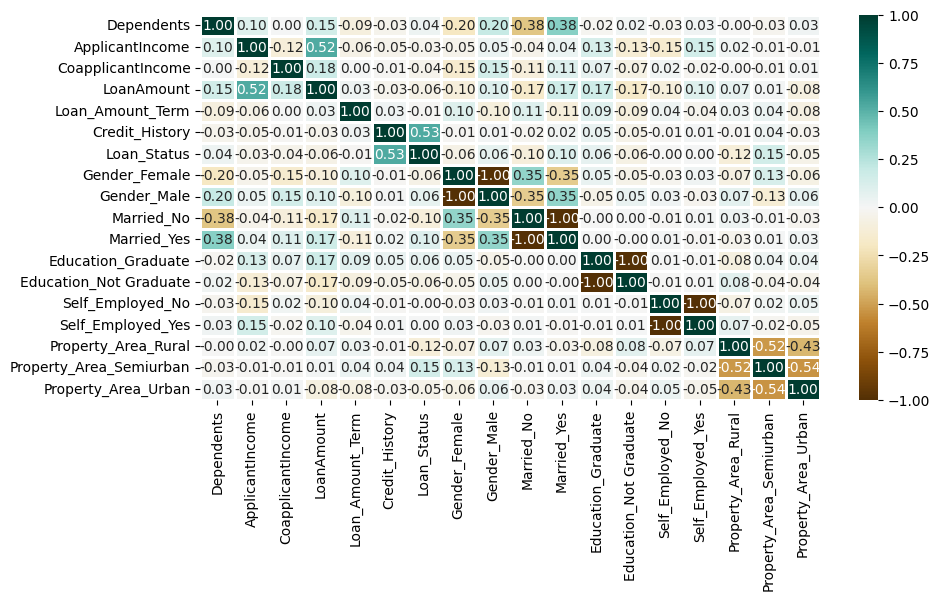

In [64]:
plt.figure(figsize=(10,5))

sns.heatmap(one_hot_encoded_data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

## Model

Get the train and test sets.

In [65]:
from sklearn.model_selection import train_test_split

X = one_hot_encoded_data.drop(['Loan_Status'],axis=1)
Y = one_hot_encoded_data['Loan_Status']
X.shape,Y.shape

((505, 17), (505,))

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((303, 17), (202, 17), (303,), (202,))

Train and test Random Forest Classifier. The train score is 98 but the test score is only 66.

In [68]:
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)

# making predictions on the training set
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_train)
print("Accuracy score of ", rfc.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train, Y_pred))

Accuracy score of  RandomForestClassifier = 98.01980198019803


In [69]:
# making predictions on the testing set
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
print("Accuracy score of ", rfc.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test, Y_pred))

Accuracy score of  RandomForestClassifier = 66.33663366336634


## Ensemble Learning for better performance.

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [78]:
log = LogisticRegression(solver='lbfgs', max_iter=3000)
rnd = RandomForestClassifier(n_estimators=100)
svm = SVC()
voting = VotingClassifier(
    estimators=[('logistics_regression', log), ('random_forest', rnd),
     ('support_vector_machine', svm)], voting='hard')

In [79]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('logistics_regression',
                              LogisticRegression(max_iter=3000)),
                             ('random_forest', RandomForestClassifier()),
                             ('support_vector_machine', SVC())])

In [80]:
for clf in (log, rnd, svm, voting):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, Y_pred))

LogisticRegression 0.7970297029702971
RandomForestClassifier 0.7871287128712872
SVC 0.6584158415841584
VotingClassifier 0.7920792079207921
